## Fase 1: Business Understanding


Objetivo del negocio

La situación que voy a abordar afecta principalmente a clientes
morosos y a las empresas que les proveen servicios o productos a
crédito. Los clientes pueden pertenecer a diversos grupos etarios,
pero suelen incluir personas que han enfrentado dificultades
financieras, lo que les impide cumplir con sus obligaciones de pago
en tiempo y forma. Además, impacta a las áreas de cobranza
dentro de las empresas, que buscan mejorar su eficiencia y reducir
los costos asociados con la gestión de deudas.

Objetivos y requisitos del proyecto

el objetivo del proyecto de la pagina web de cobranzas tiene como propósito mejorar la eficiencia en el proceso de cobro de deudas, proporcionar una experiencia de usuario intuitiva y aumentar la tasa de recuperación de los créditos. otros objetivos son web de cobranzas tiene como propósito mejorar la eficiencia en el proceso de cobro de deudas, proporcionar una experiencia de usuario intuitiva y aumentar la tasa de recuperación de los créditos, web de cobranzas tiene como propósito mejorar la eficiencia en el proceso de cobro de deudas, proporcionar una experiencia de usuario intuitiva y aumentar la tasa de recuperación de los créditos, mejorar la comnicacion con los clientes


los requisitos de proyecto son:

-Registro y autenticación segura de usuarios.

-Recuperación de contraseñas y administración de perfiles.

-la pagina debe poder integrarse con otros sistemas de la empresa, para sincronizar datos en tiempo real sobre cuentas, deudas y pagos

-El sistema debe contar con una base de datos segura y eficiente para manejar los datos sensibles de clientes, pagos y deudas.

-Implementación de medidas para prevenir fraudes o accesos no autorizados, como monitoreo de actividad sospechosa, controles antifraude en los pagos y análisis de comportamiento inusual.

-Monitoreo del funcionamiento de la página y detección automática de fallos o caídas, con alertas enviadas al equipo de soporte.


KPI



Variables claves

**Plan** de proyecto


## Fase 2: Data Understanding

### Carga del Data Set


In [11]:
# Importamos librerías necesarias
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
#select / subir datos
#Jupyter
# df = pd.read_csv(r"C:\Users\Equipo PC\Downloads\starcraft_duoc.csv", sep=';')
# df.head(100)

#Colab
df = pd.read_csv(r"/content/df_final.csv", )
df.head(86188)

# Lee el archivo .xlsx (asegúrate de que el nombre del archivo sea correcto)
# df = pd.read_excel(r"/content/Data_202409.xlsx", sep=',')  # Reemplaza con el nombre correcto de tu archivo
# df.head(1000)


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones,gestion_positiva,cluster,etiqueta_accion
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,0,0,1,...,0,0,0,1,0,1,2,0,2,5
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,1,0,2,0
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,2,0,2,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,2,0,2,0
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86183,167823626,30-08-2024 17:50,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,3,0,3,0
86184,167993234,05-08-2024 11:28,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,2,0,3,0
86185,294124166,28-08-2024 14:28,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,0,1,0,...,0,0,0,0,0,0,4,0,3,0
86186,294156920,05-08-2024 11:28,579058038.0,NO CONTESTA,202408,0.0,NaN,0,0,0,...,0,0,1,0,0,1,2,0,3,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  int64  
 8   homologada_Contacto Directo      86188 non-null  int64  
 9   homologada_Contacto Indirecto    86188 non-null  int64  
 10  homologada_Herramientas Masivas  86188 non-null  int64  
 11  homologada_Sin Contacto          86188 non-null  int64  
 12  homologada_Sin Ges

In [ ]:
import pandas as pd

# Supongamos que ya tienes tu DataFrame df_final

# Selecciona solo las columnas de tipo float64
float_cols = df.select_dtypes(include=['float64']).columns

# Convierte las columnas seleccionadas a float32
df[float_cols] = df[float_cols].astype('float32')

# Verifica el cambio
print(df.dtypes)


deudor                               int64
fecha                               object
id_cliente                         float32
Descripcion                         object
Periodos                             int64
Pago                               float32
fecha_pago                          object
homologada_Administrativa            int64
homologada_Contacto Directo          int64
homologada_Contacto Indirecto        int64
homologada_Herramientas Masivas      int64
homologada_Sin Contacto              int64
homologada_Sin Gestion               int64
TipoGestion_Administrativa           int64
TipoGestion_Compromiso               int64
TipoGestion_Compromiso-Com           int64
TipoGestion_EMAIL                    int64
TipoGestion_Negativa                 int64
TipoGestion_Negativa-Com             int64
TipoGestion_Positiva                 int64
TipoGestion_Positiva-Adm             int64
TipoGestion_Positiva-Com             int64
TipoGestion_Positiva-Indi            int64
TipoGestion

In [ ]:
df.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones,gestion_positiva,cluster,etiqueta_accion
0,592580,21-08-2024 16:34,579058048.0,VOLVER A LLAMAR,202408,0.0,NaN,0,0,1,...,0,0,0,1,0,1,2,0,2,5
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,1,0,2,0
2,12615620,30-08-2024 17:24,579058048.0,SE INGRESA CARGA,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,0,2,0,2,0
3,12865394,12-08-2024 17:30,579058048.0,SIN TELEFONOS,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,2,0,2,0
4,12957074,05-08-2024 18:59,579058048.0,OCUPADO/CONGESTION,202408,0.0,NaN,0,0,0,...,0,0,0,0,0,1,1,0,2,0


In [ ]:
df.to_csv('df_final2.csv', index=False)

### Distribuciones numéricas

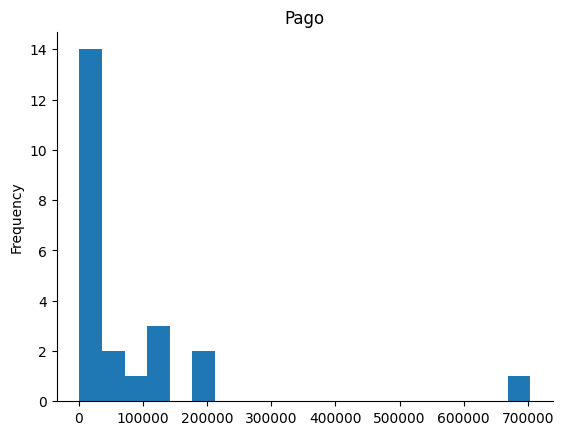

In [ ]:
#Frecuencia de pagos
from matplotlib import pyplot as plt
_df_1['Pago'].plot(kind='hist', bins=20, title='Pago')
plt.gca().spines[['top', 'right',]].set_visible(False)

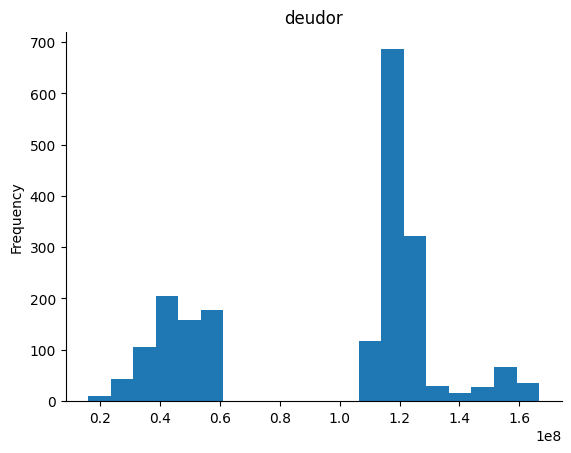

In [ ]:
#Frecuencia del deudor
from matplotlib import pyplot as plt
_df_0['deudor'].plot(kind='hist', bins=20, title='deudor')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Distribuciones categóricas

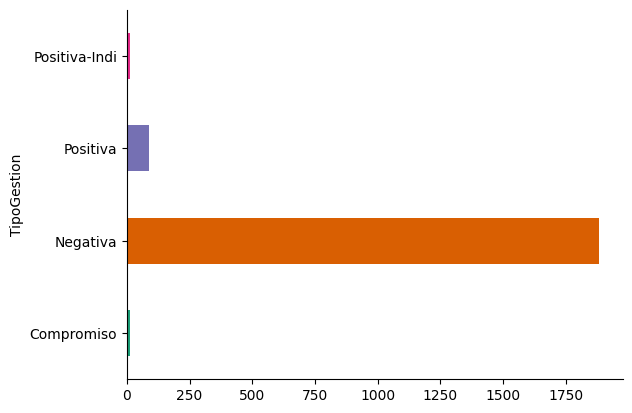

In [ ]:
#Categorías TipoGestion
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('TipoGestion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

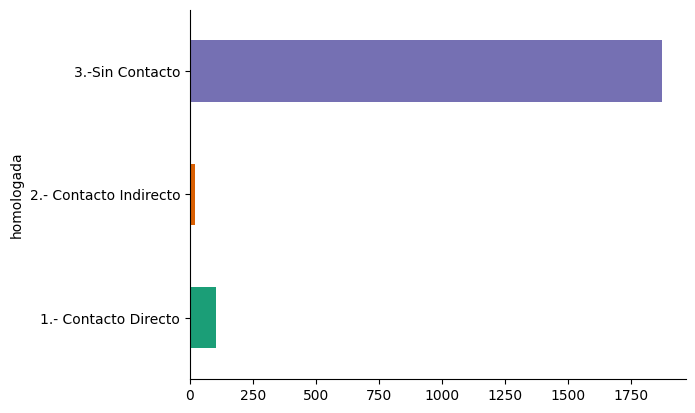

In [ ]:
#Categorías homologada
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('homologada').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### 2-d distributions

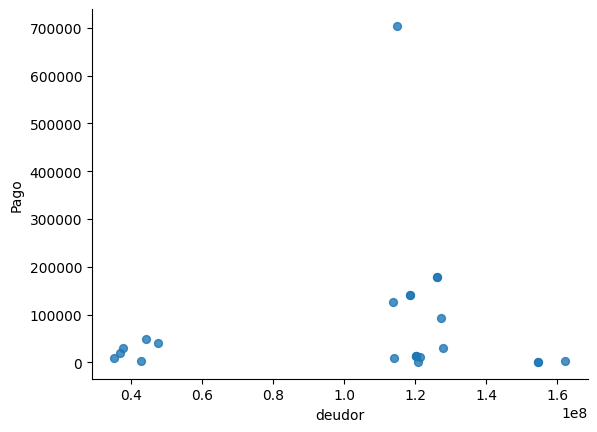

In [ ]:
#Gráfico de dispersión entre el deudor y el pago
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='deudor', y='Pago', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Series de tiempo

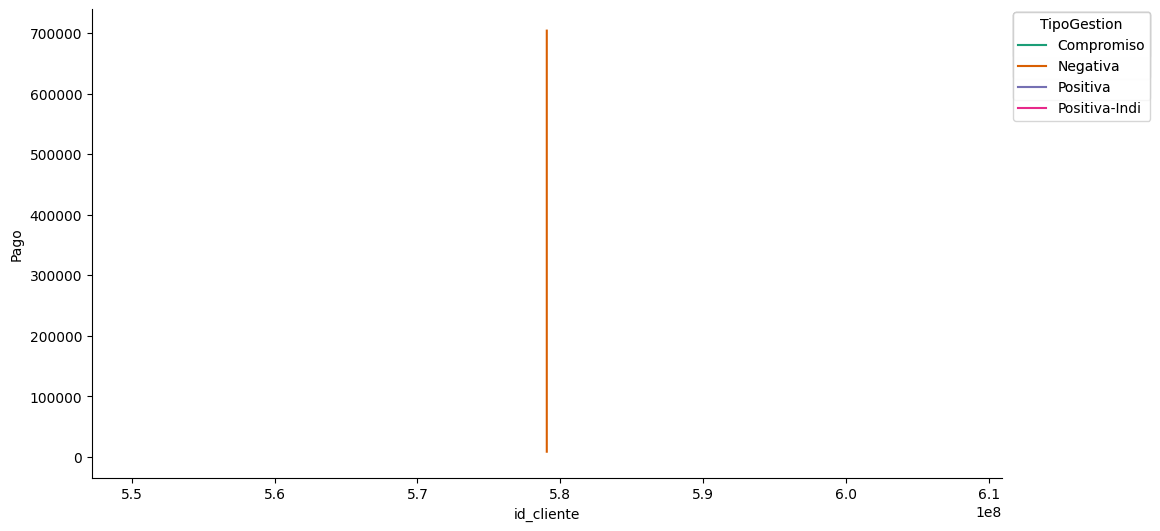

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_cliente']
  ys = series['Pago']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('id_cliente', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TipoGestion')):
  _plot_series(series, series_name, i)
  fig.legend(title='TipoGestion', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_cliente')
_ = plt.ylabel('Pago')

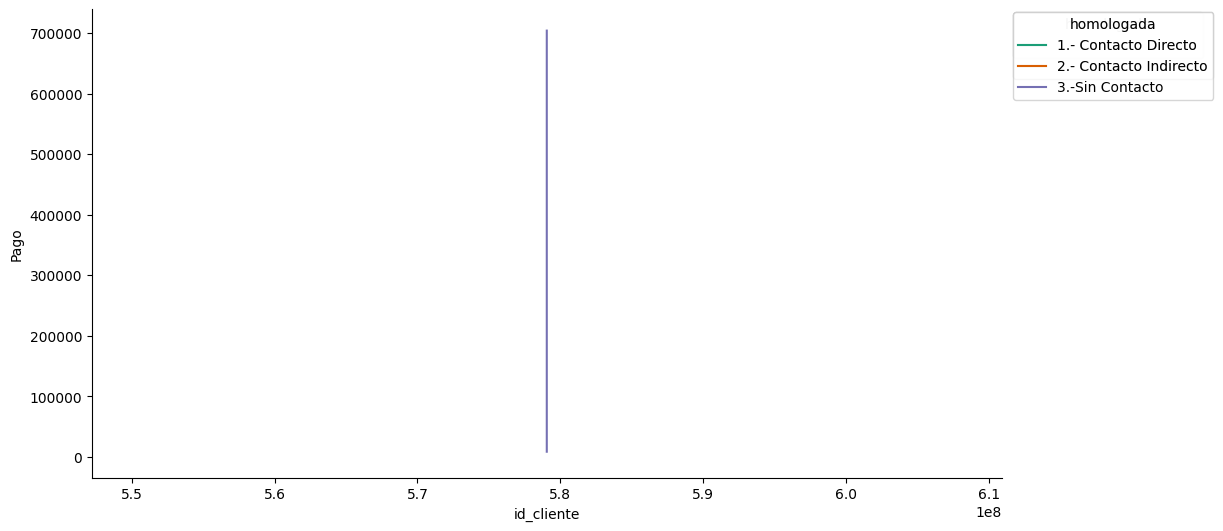

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_cliente']
  ys = series['Pago']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('id_cliente', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('homologada')):
  _plot_series(series, series_name, i)
  fig.legend(title='homologada', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_cliente')
_ = plt.ylabel('Pago')

###  Valores

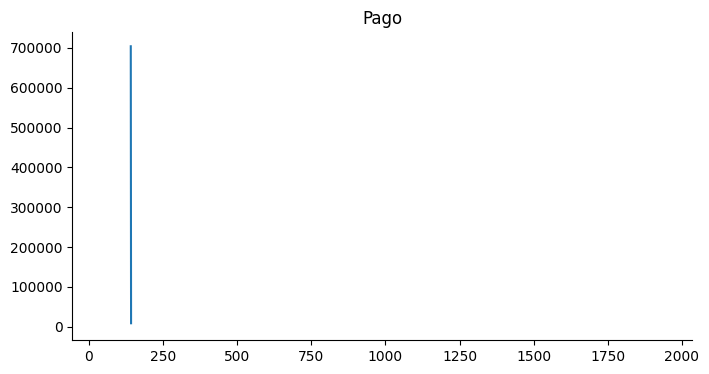

In [ ]:
from matplotlib import pyplot as plt
_df_10['Pago'].plot(kind='line', figsize=(8, 4), title='Pago')
plt.gca().spines[['top', 'right']].set_visible(False)

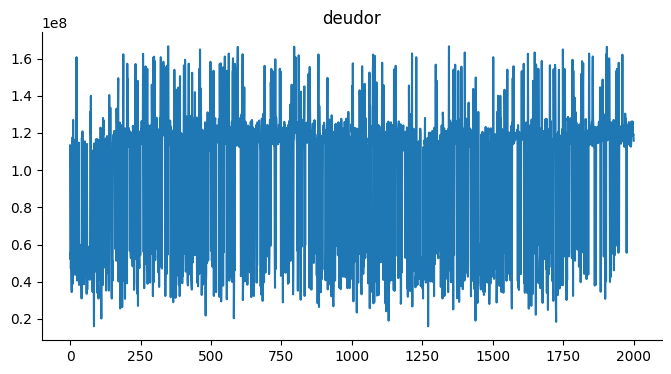

In [ ]:
from matplotlib import pyplot as plt
_df_9['deudor'].plot(kind='line', figsize=(8, 4), title='deudor')
plt.gca().spines[['top', 'right']].set_visible(False)

### mapa calor

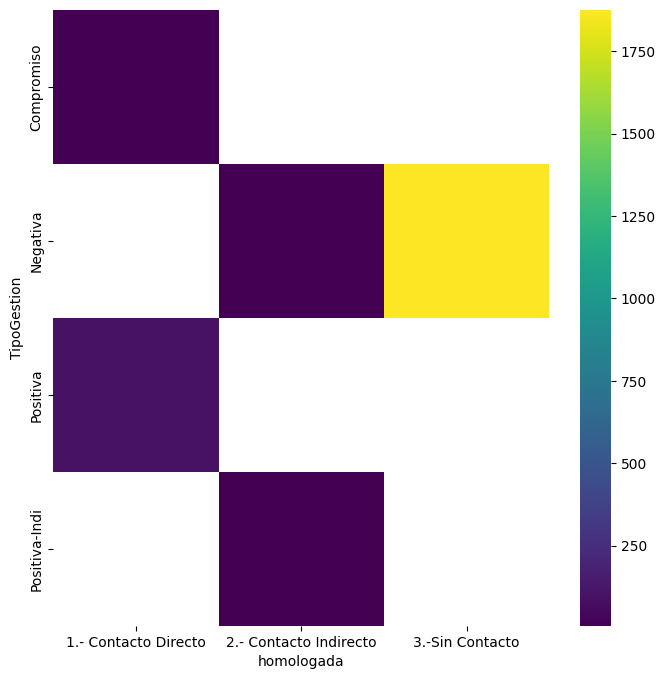

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TipoGestion'].value_counts()
    for x_label, grp in _df_11.groupby('homologada')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('homologada')
_ = plt.ylabel('TipoGestion')

### Información de los datos

In [ ]:
#Información de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   fecha        1048575 non-null  object 
 1   id_cliente   1048569 non-null  float64
 2   deudor       1048575 non-null  int64  
 3   homologada   1048569 non-null  object 
 4   TipoGestion  1048575 non-null  object 
 5   Descripcion  1048575 non-null  object 
 6   Periodos     1048575 non-null  int64  
 7   Pago         15134 non-null    float64
 8   fecha_pago   15134 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


In [ ]:
#Verificar la cantidad de nulos
df.isna().sum()

,0
fecha,0
id_cliente,6
deudor,0
homologada,6
TipoGestion,0
Descripcion,0
Periodos,0
Pago,1033441
fecha_pago,1033441


In [ ]:
#Codigo para ver los valores unicos de cada columna
df.nunique()

,0
fecha,11224
id_cliente,4
deudor,86188
homologada,6
TipoGestion,13
Descripcion,44
Periodos,1
Pago,638
fecha_pago,27


In [ ]:
#Verificar si hay filas duplicadas en todo el DataFrame
duplicates = df.duplicated().any()

if duplicates:
    print("Se encontraron filas duplicadas en el DataFrame.")
else:
    print("No se encontraron filas duplicadas en el DataFrame.")

Se encontraron filas duplicadas en el DataFrame.


In [ ]:
#Codigo para ver la distribución de los datos
df.describe()

,id_cliente,deudor,Periodos,Pago
count,1.048569e+06,1.048575e+06,1048575.0,1.513400e+04
mean,3.941595e+08,9.376376e+07,202408.0,7.023848e+04
std,2.237563e+08,3.162198e+07,0.0,3.023123e+05
min,1.233795e+08,5.925800e+05,202408.0,1.000000e+00
25%,1.233795e+08,7.023695e+07,202408.0,1.720000e+03
50%,5.790580e+08,9.240866e+07,202408.0,8.356000e+03
75%,5.790580e+08,1.188313e+08,202408.0,6.172100e+04
max,5.790581e+08,2.941620e+08,202408.0,5.098860e+06


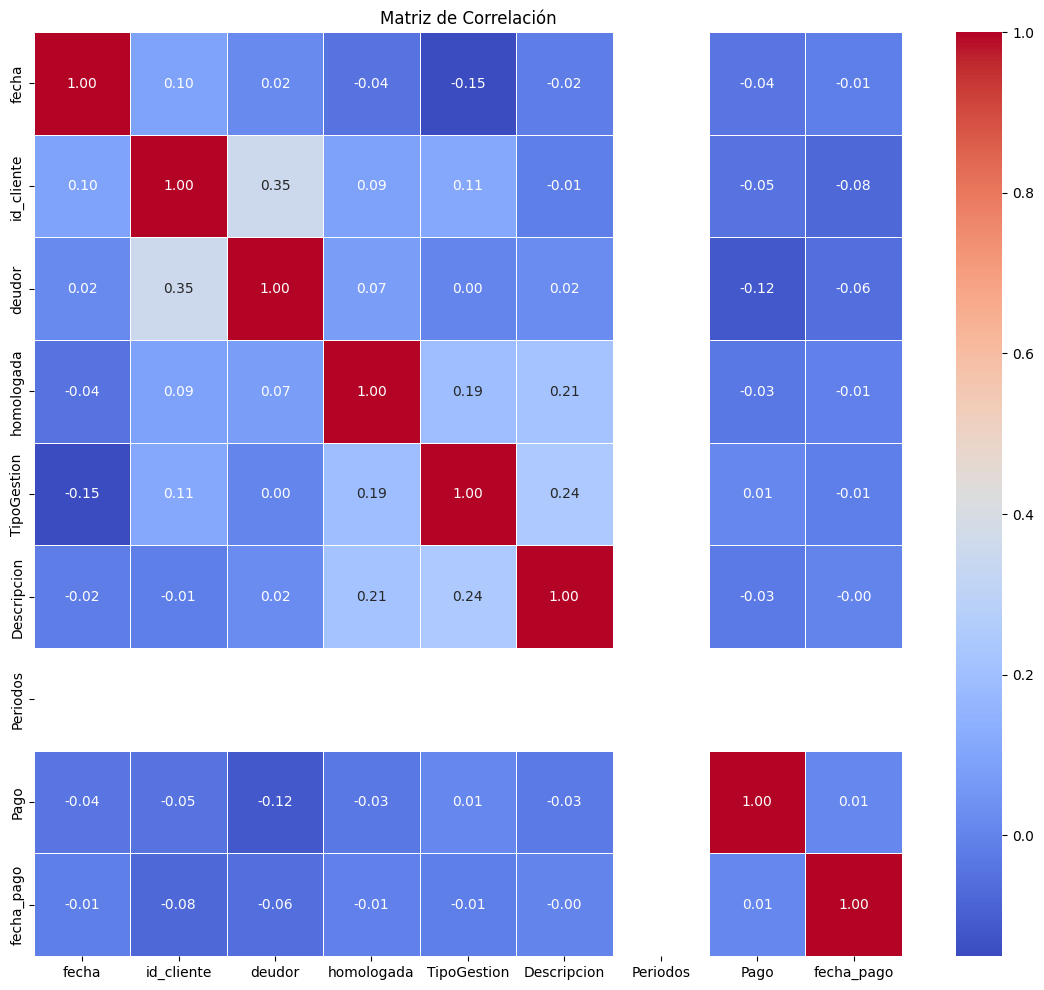

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Supongamos que el DataFrame original se llama 'df'
# Crear una copia del DataFrame para evitar modificar el original
df_copy = df.copy()

# Convertir las columnas categóricas a numéricas usando LabelEncoder
label_encoders = {}
for col in df_copy.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df_copy[col] = label_encoders[col].fit_transform(df_copy[col])

# Asegurarse de que todas las columnas sean de tipo float64
df_copy = df_copy.astype(float)

# Calcular la matriz de correlación
correlation_matrix = df_copy.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

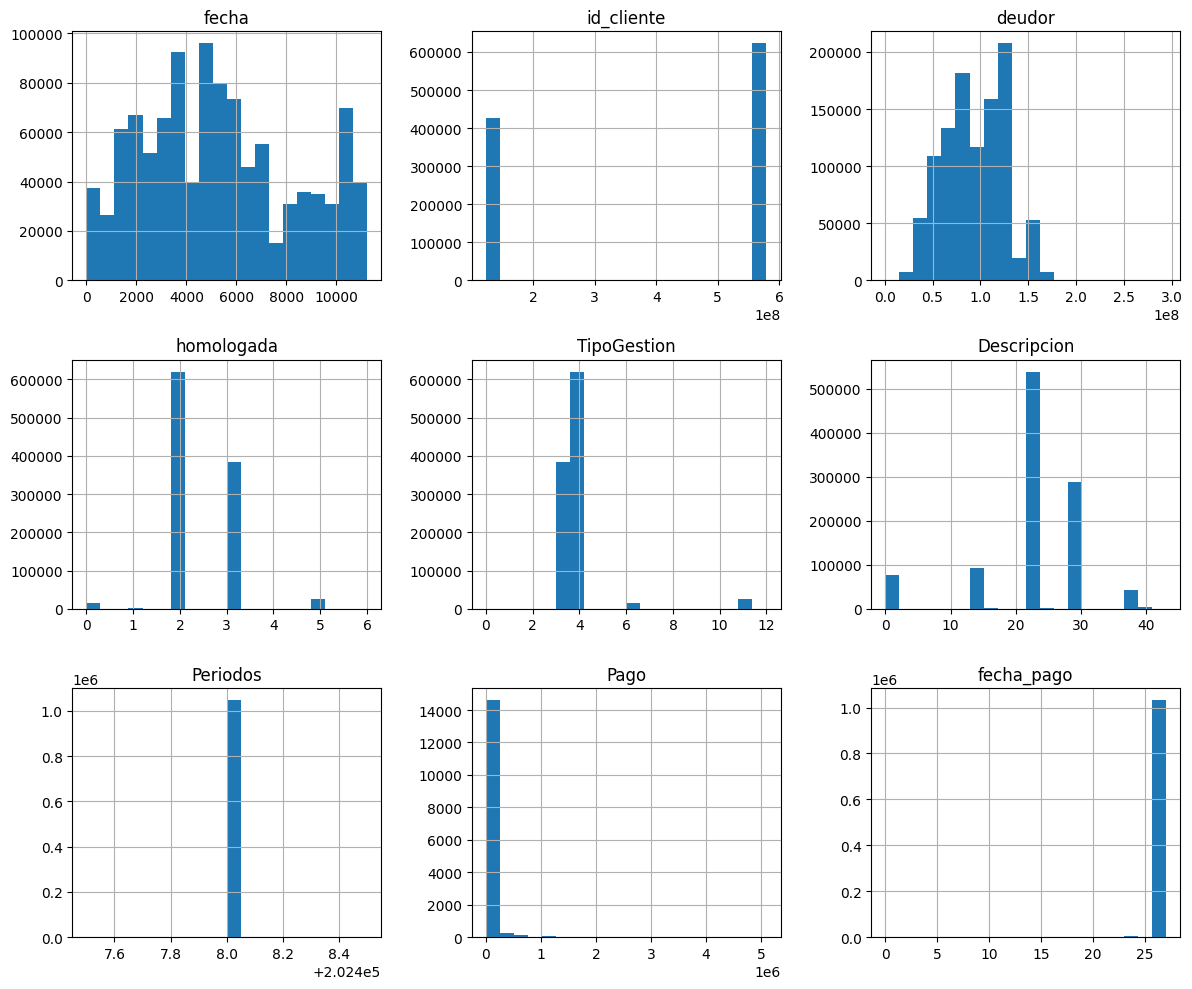

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
# df_copy = pd.read_csv('/content/Data_202409.csv')  # Reemplaza 'ruta/del/archivo.csv' con la ruta real de tu archivo CSV

# Filtrar columnas numéricas y categóricas
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_copy.select_dtypes(include=['object']).columns

# Crear histogramas para las columnas numéricas
df_copy[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Mostrar gráficos de barras para las columnas categóricas
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df_copy[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

## Fase 3: Data Preparation

In [ ]:
df.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,1.- Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN


###Transformaciones

#### Copia del dataframe

In [ ]:
df_copy = df.copy()
df_copy.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,3.-Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,3.-Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,1.- Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN


In [ ]:
import pandas as pd
import re

# Función para eliminar números y caracteres especiales del nombre de la acción
def limpiar_accion(homologada):
    if isinstance(homologada, str):  # Verificar si el valor es una cadena
        # Usamos una expresión regular para quitar números, puntos y guiones
        return re.sub(r'\d+[\.-]*', '', homologada).strip()
    else:
        return homologada  # Si no es una cadena, devolver el valor tal como está

# Aplicar la función a la columna 'homologada'
df_copy['homologada'] = df_copy['homologada'].apply(limpiar_accion)

# Mostrar el DataFrame actualizado
df_copy.head(50000)


,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
1,01-08-2024 9:10,579058038.0,52268294,Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
2,01-08-2024 9:10,579058038.0,55801490,Sin Contacto,Negativa,BUZON DE VOZ,202408,NaN,NaN
3,01-08-2024 9:10,579058038.0,47055326,Sin Contacto,Negativa,NO CONTESTA,202408,NaN,NaN
4,01-08-2024 9:10,579058038.0,55078706,Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,NaN,NaN
...,...,...,...,...,...,...,...,...,...
49995,02-08-2024 12:01,579058038.0,58102712,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN
49996,02-08-2024 12:01,579058038.0,58071164,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN
49997,02-08-2024 12:01,579058038.0,58058096,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN
49998,02-08-2024 12:01,579058038.0,35377544,Herramientas Masivas,EMAIL,ENVIO EMAIL COMERCIAL,202408,NaN,NaN


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   fecha        1048575 non-null  object 
 1   id_cliente   1048569 non-null  float64
 2   deudor       1048575 non-null  int64  
 3   homologada   1048569 non-null  object 
 4   TipoGestion  1048575 non-null  object 
 5   Descripcion  1048575 non-null  object 
 6   Periodos     1048575 non-null  int64  
 7   Pago         15134 non-null    float64
 8   fecha_pago   15134 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


In [ ]:
df_copy.isna().sum()

,0
fecha,0
id_cliente,6
deudor,0
homologada,6
TipoGestion,0
Descripcion,0
Periodos,0
Pago,1033441
fecha_pago,1033441


In [ ]:
#Imputación por 0 de la variable 'Pago'
df_copy['Pago'] = df_copy['Pago'].fillna(0)

In [ ]:
df_copy2 = df_copy.copy()
df_copy2.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,Sin Contacto,Negativa,BUZON DE VOZ,202408,0.0,NaN
1,01-08-2024 9:10,579058038.0,52268294,Sin Contacto,Negativa,NO CONTESTA,202408,0.0,NaN
2,01-08-2024 9:10,579058038.0,55801490,Sin Contacto,Negativa,BUZON DE VOZ,202408,0.0,NaN
3,01-08-2024 9:10,579058038.0,47055326,Sin Contacto,Negativa,NO CONTESTA,202408,0.0,NaN
4,01-08-2024 9:10,579058038.0,55078706,Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,0.0,NaN


#### Nuevo dataframe

In [ ]:
# # Agrupar por la columna 'deudor' y sumar los montos
# df_agrupado = df_copy2.groupby('deudor').sum().reset_index()

# # Mostrar el DataFrame agrupado
# df_agrupado.head()

# Agrupar por la columna 'deudor' y aplicar funciones específicas para cada columna
df_agrupado = df_copy2.groupby('deudor').agg({
    'Pago': 'sum',  # Sumar los montos de Pago
    'fecha': lambda x: ', '.join(map(str, x.unique())),
    'fecha_pago': lambda x: ', '.join(map(str, x.unique())),
    'id_cliente': lambda x: ', '.join(map(str, x.unique())),  # Concatenar los id_cliente únicos separados por coma
    'homologada': lambda x: ', '.join(map(str, x.unique())),  # Tomar el primer valor de homologada (puedes cambiar esto si lo necesitas) # Tomar el primer valor de AccionCobranza
    'TipoGestion': lambda x: ', '.join(map(str, x.unique())),  # Tomar el primer valor de TipoGestion
    'Descripcion': lambda x: ', '.join(map(str, x.unique()))  # Tomar el primer valor de Descripcion
}).reset_index()

# Mostrar el DataFrame agrupado
df_agrupado.head()


,deudor,Pago,fecha,fecha_pago,id_cliente,homologada,TipoGestion,Descripcion
0,592580,0.0,"21-08-2024 11:06, 21-08-2024 16:34",nan,579058038.0,"Contacto Indirecto, Sin Contacto","Positiva-Indi, Negativa","VOLVER A LLAMAR, NO CONTESTA"
1,8620334,0.0,12-08-2024 17:30,nan,123379488.0,Sin Contacto,Negativa,SIN TELEFONOS
2,12615620,0.0,"06-08-2024 8:00, 07-08-2024 16:11, 08-08-2024 ...",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, OCUPADO/CONGESTION, NO CONTE..."
3,12865394,0.0,"06-08-2024 8:00, 12-08-2024 17:30",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, SIN TELEFONOS"
4,12957074,0.0,"03-08-2024 17:12, 05-08-2024 18:59",nan,579058038.0,Sin Contacto,Negativa,OCUPADO/CONGESTION


In [ ]:
df_agrupado.nunique()

,0
deudor,86188
Pago,704
fecha,47407
fecha_pago,28
id_cliente,5
homologada,175
TipoGestion,292
Descripcion,6096


In [ ]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deudor       86188 non-null  int64  
 1   Pago         86188 non-null  float64
 2   fecha        86188 non-null  object 
 3   fecha_pago   86188 non-null  object 
 4   id_cliente   86188 non-null  object 
 5   homologada   86188 non-null  object 
 6   TipoGestion  86188 non-null  object 
 7   Descripcion  86188 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Crear una nueva columna binaria 'PagoBinario' en df_copy
df_agrupado['PagoBinario'] = df_agrupado['Pago'].apply(lambda x: 1 if x > 0 else 0)

# Mostrar los primeros registros para verificar
df_agrupado['PagoBinario'].head()

,PagoBinario
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_agrupado['PagoBinario'].unique()

array([0, 1])

In [ ]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deudor       86188 non-null  int64  
 1   Pago         86188 non-null  float64
 2   fecha        86188 non-null  object 
 3   fecha_pago   86188 non-null  object 
 4   id_cliente   86188 non-null  object 
 5   homologada   86188 non-null  object 
 6   TipoGestion  86188 non-null  object 
 7   Descripcion  86188 non-null  object 
 8   PagoBinario  86188 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 5.9+ MB


In [ ]:
df_agrupado.head()

,deudor,Pago,fecha,fecha_pago,id_cliente,homologada,TipoGestion,Descripcion,PagoBinario
0,8620334,0.0,12-08-2024 17:30,nan,123379488.0,Sin Contacto,Negativa,SIN TELEFONOS,0
1,12615620,0.0,"06-08-2024 8:00, 07-08-2024 16:11, 08-08-2024 ...",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, OCUPADO/CONGESTION, NO CONTESTA",0
2,12865394,0.0,"06-08-2024 8:00, 12-08-2024 17:30",nan,579058038.0,"Sin Gestion, Sin Contacto","Sistema, Negativa","SE INGRESA CARGA, SIN TELEFONOS",0
3,12957074,0.0,"03-08-2024 17:12, 05-08-2024 18:59",nan,579058038.0,Sin Contacto,Negativa,OCUPADO/CONGESTION,0
4,13061276,0.0,"03-08-2024 17:13, 05-08-2024 18:59",nan,579058038.0,Sin Contacto,Negativa,"CORTAN LLAMADO, NO CORRESPONDE TELEFONO/NO VIV...",0


In [ ]:
# Importar las librerías necesarias
import pandas as pd

# Aplicar One-Hot Encoding a las columnas 'homologada', 'TipoGestion' y 'Descripcion'
df_encoded = pd.get_dummies(df_copy2, columns=['homologada', 'TipoGestion'], prefix=['homologada', 'TipoGestion'])

# Agrupar por 'deudor' de nuevo, sumando los valores binarios para cada categoría
df_final = df_encoded.groupby('deudor').max().reset_index()

# Mostrar el resultado final con las variables binarias
df_final.head()


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,TipoGestion_EMAIL,TipoGestion_Negativa,TipoGestion_Negativa-Com,TipoGestion_Positiva,TipoGestion_Positiva-Adm,TipoGestion_Positiva-Com,TipoGestion_Positiva-Indi,TipoGestion_Positiva-Wsp,TipoGestion_Sistema,TipoGestion_Terreno
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Crear una nueva columna binaria 'PagoBinario' en df_copy
df_final['PagoBinario'] = df_final['Pago'].apply(lambda x: 1 if x > 0 else 0)

# Mostrar los primeros registros para verificar
df_final['PagoBinario'].head()

,PagoBinario
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  bool   
 8   homologada_Contacto Directo      86188 non-null  bool   
 9   homologada_Contacto Indirecto    86188 non-null  bool   
 10  homologada_Herramientas Masivas  86188 non-null  bool   
 11  homologada_Sin Contacto          86188 non-null  bool   
 12  homologada_Sin Ges

In [ ]:
import pandas as pd

# Suponiendo que df_copy2 es tu DataFrame original y ya contiene las columnas de descripciones

# Diccionario para mapear descripciones a acciones
accion_dict = {
    'Sin acciones': [
        'CORTAN LLAMADO',
        'SIN TELEFONOS',
        'TELEFONO VACANTE/MALO/FUERA DE SERVICIO',
        'NO CORRESPONDE TELEFONO/NO TRABAJA ALLI/NO LO CONOCEN',
        'NO CORRESPONDE TELEFONO/NO VIVE ALLI/NO LO CONOCEN',
        'NO RECIBEN RECADOS',
        'NO QUIERE PAGA/DESCONOCE LA DEUDA',
        'DEUDOR NO INFORMADO',
        'DICE QUE PAGO/ABONO/RENEGOCIO',
        'NO PUEDE PAGAR',
        'OCUPADO/CONGESTION'
    ],
    'Correo electrónico': [
        'EMAIL - DICE QUE PAGO/ABONO/RENEGOCIO',
        'ENVIO EMAIL COMERCIAL',
        'EMAIL - CONTACTO DEUDOR',
        'EMAIL - COMPROMISO DE PAGO',
        'EMAIL - SE CONFIRMA PAGO'
    ],
    'SMS': [
        'COMENTARIO',  # Ejemplo de un comentario que se incluirá en SMS
        'COMENTARIO - COMPROMISO PAGO',
        'COMENTARIO - CONTACTO DEUDOR',
        'COMENTARIO - NO QUIERE PAGAR'
        # Agrega más descripciones relacionadas a SMS aquí si es necesario
    ],
    'Whatsapp': [
        'WHATSAPP - CONTACTO DEUDOR',
        'WHATSAPP - COMPROMISO DE PAGO'
    ],
    'Llamada por bot': [
        'BUZON DE VOZ',
        'NO CONTESTA'
    ],
    'Llamada directa': [
        'CONTACTO DEUDOR',
        'COMPROMISO DE PAGO',
        'RECADO EN CASA',
        'RECADO EN OFICINA',
        'PIDE VOLVER A LLAMAR',
        'VOLVER A LLAMAR',
        'SE CONFIRMA PAGO',
        'CLIENTE REALIZARA PLAN DE PAGOS',
        'COMPROMISO PAGO - TRANSFERENCIA DE FONDOS',
        'TERCERO ENTREGA NUEVO TELEFONO',
        'CLIENTE IRA A LA SUCURSAL',
        'RESPUESTA COBRADOR EN TERRENO',
        'COMPROMISO PAGO - COORDINACION'
    ],
    'Acciones judiciales': [
        'DEUDOR FALLECIDO ( PRESENTA CERTIFICADO )',
        'POSIBLE RECLAMO'
    ]
}

# Crear columnas binarias para cada acción
for accion in accion_dict.keys():
    df_final[accion] = df_final['Descripcion'].apply(
        lambda x: 1 if any(desc in x for desc in accion_dict[accion]) else 0
    )

# Mostrar el DataFrame resultante
df_final.head()


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,TipoGestion_Sistema,TipoGestion_Terreno,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,False,False,0,0,0,0,0,0,1,0
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,False,0,1,0,0,0,0,0,0
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,True,False,0,0,0,0,0,0,0,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,True,False,0,1,0,0,0,0,0,0
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,False,False,0,1,0,0,0,0,0,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  bool   
 8   homologada_Contacto Directo      86188 non-null  bool   
 9   homologada_Contacto Indirecto    86188 non-null  bool   
 10  homologada_Herramientas Masivas  86188 non-null  bool   
 11  homologada_Sin Contacto          86188 non-null  bool   
 12  homologada_Sin Ges

In [ ]:
import pandas as pd

# Supongamos que df_copy2 es tu DataFrame y ya contiene las columnas binarias
# Asegúrate de que las columnas binarias estén en el DataFrame antes de ejecutar este código

# Sumar las columnas binarias para crear una nueva columna 'Cantidad_Gestiones'
df_final['Cantidad_AccionesCobranza'] = df_final[['Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp', 'Llamada por bot', 'Llamada directa', 'Acciones judiciales']].sum(axis=1)

# Mostrar el DataFrame resultante con la nueva columna
df_final.head()


,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,TipoGestion_Terreno,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,False,0,0,0,0,0,0,1,0,1
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,0,1,0,0,0,0,0,0,1
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,False,0,0,0,0,0,0,0,0,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,False,0,1,0,0,0,0,0,0,1
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,False,0,1,0,0,0,0,0,0,1


In [ ]:
df_final['Cantidad_AccionesCobranza'].unique()

array([1, 0, 2])

In [ ]:
df_final['Cantidad_AccionesCobranza'].isna().sum()

0

In [ ]:
import pandas as pd

# Supongamos que df_copy2 es tu DataFrame y ya contiene las columnas binarias para los tipos de gestión
# Asegúrate de que las columnas binarias estén en el DataFrame antes de ejecutar este código

# Sumar todas las columnas de tipo de gestión para crear una nueva columna de cantidad de gestiones
df_final['Cantidad_Gestiones'] = df_final[['TipoGestion_Administrativa',
                                             'TipoGestion_Compromiso',
                                             'TipoGestion_Compromiso-Com',
                                             'TipoGestion_EMAIL',
                                             'TipoGestion_Negativa',
                                             'TipoGestion_Negativa-Com',
                                             'TipoGestion_Positiva',
                                             'TipoGestion_Positiva-Adm',
                                             'TipoGestion_Positiva-Com',
                                             'TipoGestion_Positiva-Indi',
                                             'TipoGestion_Positiva-Wsp',
                                             'TipoGestion_Sistema',
                                             'TipoGestion_Terreno']].sum(axis=1)

# Mostrar el DataFrame resultante con la nueva columna
df_final[['Cantidad_Gestiones']].head()


,Cantidad_Gestiones
0,2
1,1
2,2
3,2
4,1


In [ ]:
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,0,0,0,0,0,0,1,0,1,2
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,1
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,0,0,0,0,0,0,0,0,0,2
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,2
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
df_final['Cantidad_Gestiones'].unique()

array([2, 1, 3, 4, 5, 7, 6, 8])

In [ ]:
df_final['Cantidad_Gestiones'].isna().sum()

0

In [ ]:
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,PagoBinario,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,0,0,0,0,0,0,1,0,1,2
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,1
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,0,0,0,0,0,0,0,0,0,2
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,2
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
import pandas as pd

# Supongamos que df_copy2 es tu DataFrame y que ya contiene la columna 'Pago' en formato binario
# Creamos la columna 'gestion_positiva' basada en la columna 'Pago'

df_final['gestion_positiva'] = df_final['Pago'].apply(lambda x: 1 if x == 1 else 0)

# Mostrar el DataFrame resultante con la nueva columna
df_final[['Pago', 'gestion_positiva']].head()


,Pago,gestion_positiva
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [ ]:
df_final['gestion_positiva'].unique()

array([0, 1])

In [ ]:
df_final['gestion_positiva'].isna().sum()

0

In [ ]:
df_final.head()

,deudor,fecha,id_cliente,Descripcion,Periodos,Pago,fecha_pago,homologada_Administrativa,homologada_Contacto Directo,homologada_Contacto Indirecto,...,Sin acciones,Correo electrónico,SMS,Whatsapp,Llamada por bot,Llamada directa,Acciones judiciales,Cantidad_AccionesCobranza,Cantidad_Gestiones,gestion_positiva
0,592580,21-08-2024 16:34,579058038.0,VOLVER A LLAMAR,202408,0.0,NaN,False,False,True,...,0,0,0,0,0,1,0,1,2,0
1,8620334,12-08-2024 17:30,123379488.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,1,0,0,0,0,0,0,1,1,0
2,12615620,30-08-2024 17:24,579058038.0,SE INGRESA CARGA,202408,0.0,NaN,False,False,False,...,0,0,0,0,0,0,0,0,2,0
3,12865394,12-08-2024 17:30,579058038.0,SIN TELEFONOS,202408,0.0,NaN,False,False,False,...,1,0,0,0,0,0,0,1,2,0
4,12957074,05-08-2024 18:59,579058038.0,OCUPADO/CONGESTION,202408,0.0,NaN,False,False,False,...,1,0,0,0,0,0,0,1,1,0


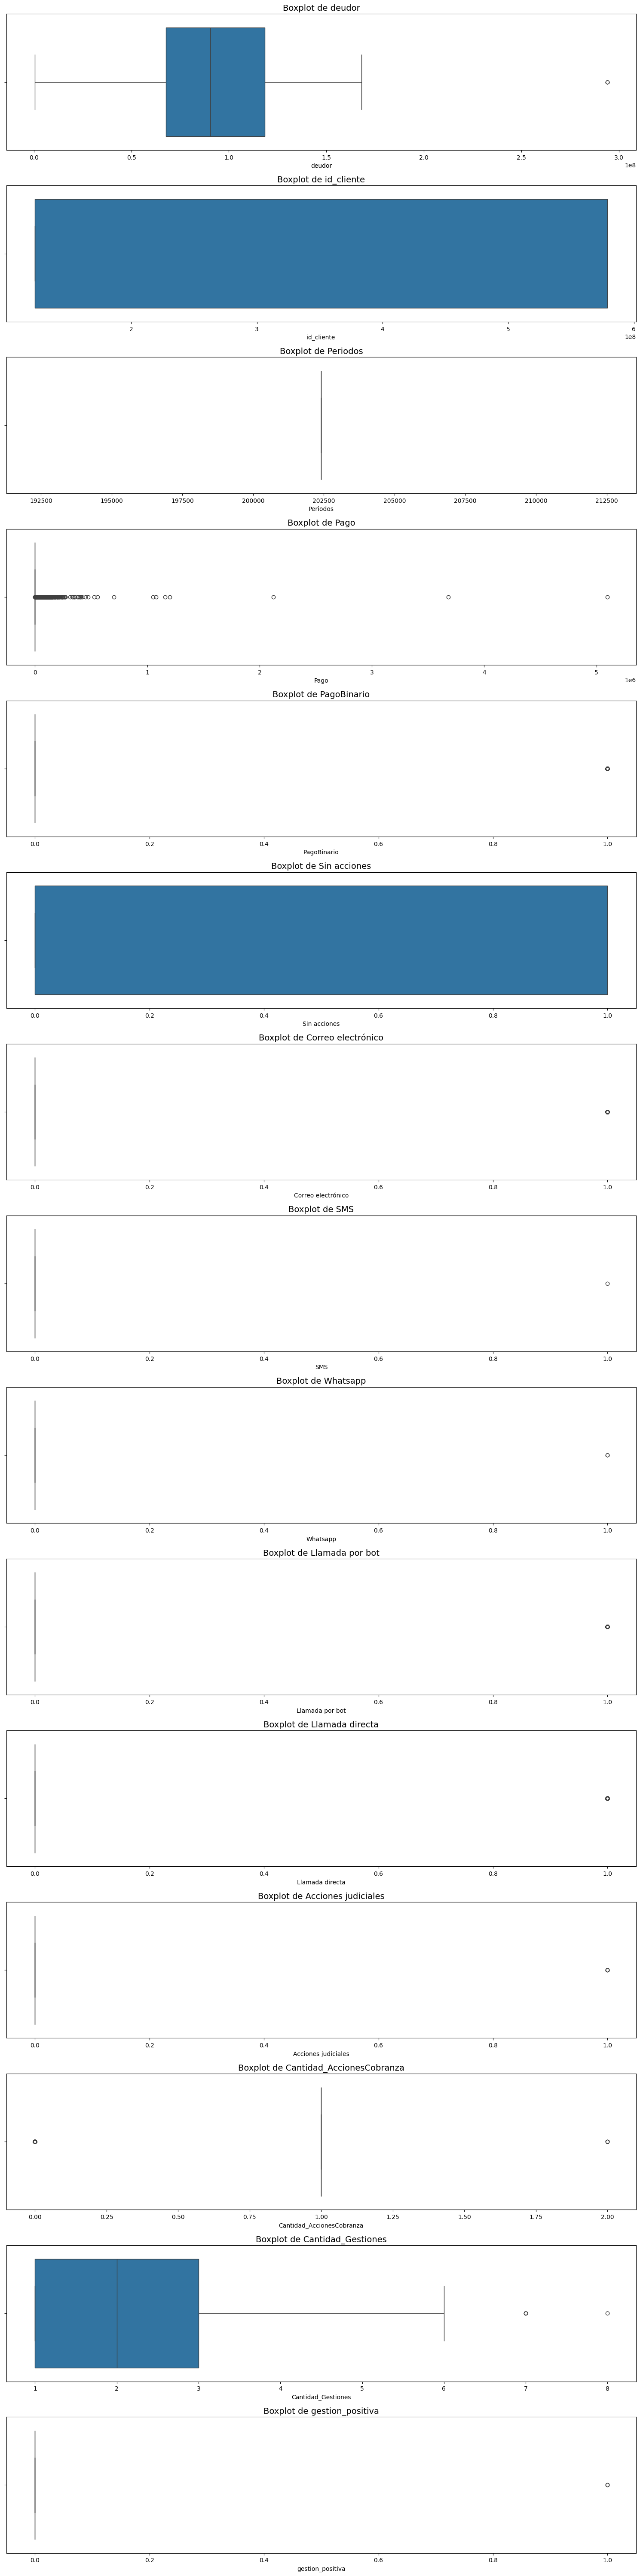

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
df_numeric = df_final.select_dtypes(include=['float64', 'int64'])

# Crear gráficos de caja para todas las columnas numéricas
plt.figure(figsize=(15, len(df_numeric.columns) * 4))  # Ajusta el tamaño según la cantidad de columnas
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(len(df_numeric.columns), 1, i)  # Crear subplots dinámicamente
    sns.boxplot(data=df_numeric, x=column)
    plt.title(f'Boxplot de {column}', fontsize=14)
    plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Fase 4: Modeling

In [ ]:
df_copy.head()

,fecha,id_cliente,deudor,homologada,TipoGestion,Descripcion,Periodos,Pago,fecha_pago
0,01-08-2024 9:09,579058038.0,113259344,Sin Contacto,Negativa,BUZON DE VOZ,202408,0.0,NaN
1,01-08-2024 9:10,579058038.0,52268294,Sin Contacto,Negativa,NO CONTESTA,202408,0.0,NaN
2,01-08-2024 9:10,579058038.0,55801490,Sin Contacto,Negativa,BUZON DE VOZ,202408,0.0,NaN
3,01-08-2024 9:10,579058038.0,47055326,Sin Contacto,Negativa,NO CONTESTA,202408,0.0,NaN
4,01-08-2024 9:10,579058038.0,55078706,Contacto Directo,Positiva,DEUDOR NO INFORMADO,202408,0.0,NaN


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86188 entries, 0 to 86187
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   deudor                           86188 non-null  int64  
 1   fecha                            86188 non-null  object 
 2   id_cliente                       86182 non-null  float64
 3   Descripcion                      86188 non-null  object 
 4   Periodos                         86188 non-null  int64  
 5   Pago                             86188 non-null  float64
 6   fecha_pago                       748 non-null    object 
 7   homologada_Administrativa        86188 non-null  bool   
 8   homologada_Contacto Directo      86188 non-null  bool   
 9   homologada_Contacto Indirecto    86188 non-null  bool   
 10  homologada_Herramientas Masivas  86188 non-null  bool   
 11  homologada_Sin Contacto          86188 non-null  bool   
 12  homologada_Sin Ges

#### Modelo k-means

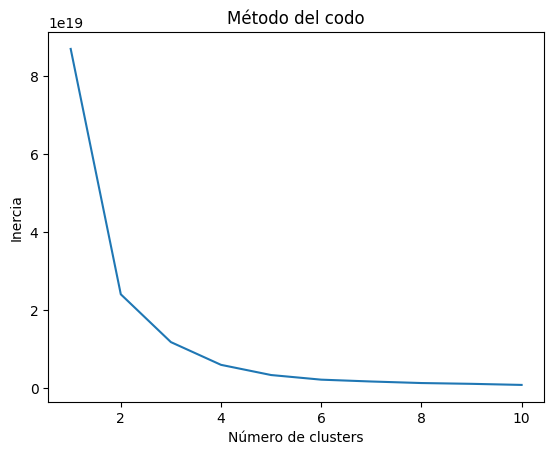

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asegúrate de que df_final es tu DataFrame principal

# Excluir columnas no relevantes como id_cliente y fecha_pago
cols_to_exclude = ['id_cliente', 'fecha_pago']  # Puedes agregar más columnas si es necesario
df_numeric = df_final.drop(columns=cols_to_exclude, errors='ignore')

# Filtrar solo las columnas numéricas (float64 o int64) para aplicar KMeans
df_numeric = df_numeric.select_dtypes(include=['float64', 'int64'])

# Escalar los datos numéricos
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(df_numeric)

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

# Aplicar el modelo K-means con el número óptimo de clusters (por ejemplo, 7)
# kmeans_final = KMeans(n_clusters=7, random_state=42)

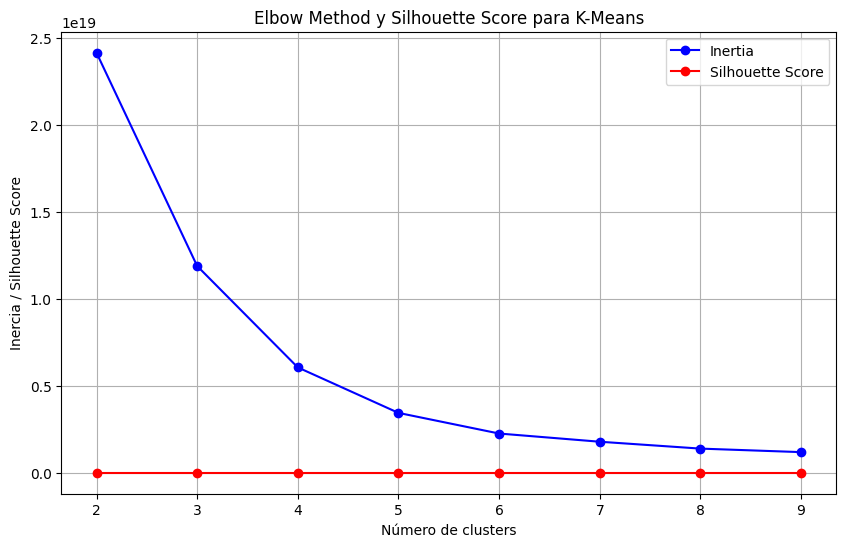

In [ ]:
# Codigo para determinar el Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# Seleccionar los datos de df_copy
df_selected = df_final

# Seleccionar las variables relevantes
selected_features = [
    'deudor',
    'PagoBinario',
    'TipoGestion_Administrativa',
    'TipoGestion_Compromiso',
    'TipoGestion_Compromiso-Com',
    'TipoGestion_EMAIL',
    'TipoGestion_Negativa',
    'TipoGestion_Negativa-Com',
    'TipoGestion_Positiva',
    'TipoGestion_Positiva-Adm',
    'TipoGestion_Positiva-Com',
    'TipoGestion_Positiva-Indi',
    'TipoGestion_Positiva-Wsp',
    'TipoGestion_Sistema',
    'TipoGestion_Terreno',
    'Sin acciones',
    'Correo electrónico',
    'SMS',
    'Whatsapp',
    'Llamada por bot',
    'Llamada directa',
    'Acciones judiciales',
    'Cantidad_AccionesCobranza',
    'Cantidad_Gestiones',
    'gestion_positiva'
]



# Filtrar el DataFrame con las variables seleccionadas
df_filtered = df_selected[selected_features]

# Preprocesamiento: Normalización
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_filtered)

# K-Means con selección de clusters usando Elbow Method
inertia_values = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_filtered, kmeans.labels_))

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'bo-', label='Inertia')
plt.plot(k_values, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia / Silhouette Score')
plt.title('Elbow Method y Silhouette Score para K-Means')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Kmeans1 centroides
# Realizar el anÃ¡lisis de componentes principales (PCA)
pca = PCA(n_components=3)
datos_pca = pca.fit_transform(df_filtered)

# Muestra la forma de los centroides
# print("Shape de los centroides:", centroides.shape)

# # # Muestra las posiciones de las primeras 5 muestras en sus primeras dos componentes principales
# print("Posiciones de las primeras 5 muestras en sus primeras dos componentes principales:")
# print(datos_pca[:5, :])

<ipython-input-57-66eaaa48d32c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans.fit_predict(df_filtered)  # Guardar las etiquetas del clúster
<ipython-input-57-66eaaa48d32c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-57-66eaaa48d32c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

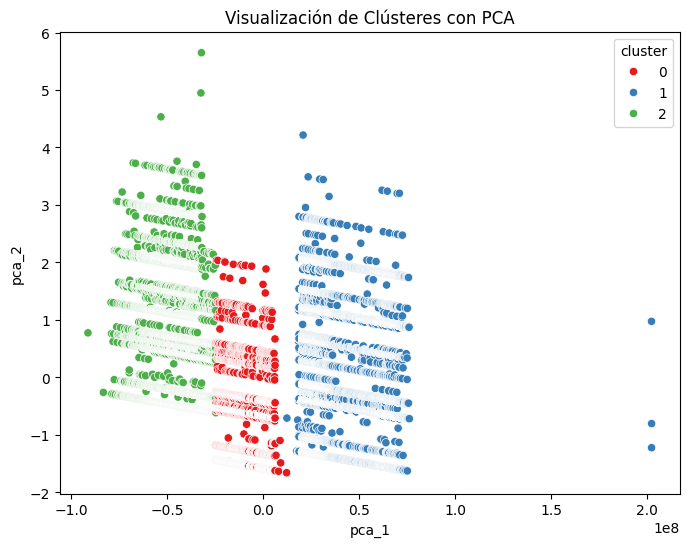

Inercia: 1.1881178993159033e+19
Índice de Silueta: 0.627839137611411
Índice de Calinski-Harabasz: 272611.846450883
Davies-Bouldin Index: 0.5062497129378456


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# # Normalización de los datos antes de aplicar K-means
# scaler = StandardScaler()
# df_filtered_scaled = scaler.fit_transform(df_filtered)  # Normalización de las variables numéricas

# Aplicación del modelo K-means (con 3 clusters por ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(df_filtered)  # Guardar las etiquetas del clúster

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca = PCA(n_components=2)  # Usamos 2 componentes para visualización en 2D
pca_components = pca.fit_transform(df_filtered)  # Aplicar PCA a los datos escalados

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Visualización de los clusters con PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1')
plt.title('Visualización de Clústeres con PCA')
plt.show()

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta (con datos normalizados y sin las etiquetas de clúster)
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


<ipython-input-87-e8c34a74532a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans2.fit_predict(df_filtered)
<ipython-input-87-e8c34a74532a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_components[:, 0]
<ipython-input-87-e8c34a74532a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

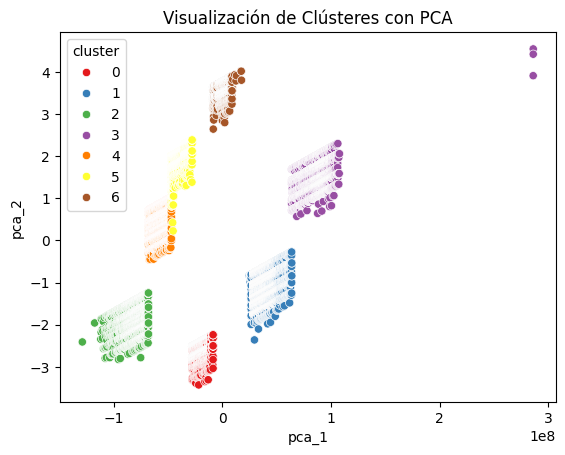

Inercia: 3.5629327598327173e+18
Índice de Silueta: 0.6568404896815747
Índice de Calinski-Harabasz: 687457.4704521112
Davies-Bouldin Index: 0.43213843440023586


In [ ]:
#Modelo k-means con 7 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Normalización de los datos antes de aplicar K-means
# scaler = StandardScaler()
# df_filtered = scaler.fit_transform(df_filtered)

# Aplicación del modelo K-means (con 3 clusters por ejemplo)
kmeans2 = KMeans(n_clusters=7, random_state=42)
df_filtered['cluster'] = kmeans2.fit_predict(df_filtered)

# Reducción de dimensionalidad con PCA a 2 componentes para visualización
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df_filtered)

# Agregar las componentes principales al DataFrame para visualización
df_filtered['pca_1'] = pca_components[:, 0]
df_filtered['pca_2'] = pca_components[:, 1]

# Visualización de los clusters con PCA
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df_filtered, palette='Set1')
plt.title('Visualización de Clústeres con PCA')
plt.show()

# Calcular la inercia (within-cluster sum of squares)
inertia = kmeans2.inertia_
print(f"Inercia: {inertia}")

# Calcular el índice de silueta
silhouette_avg = silhouette_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Silueta: {silhouette_avg}")

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_filtered, df_filtered['cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Calcular el índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


#### Modelo LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Organiza los datos por 'deudor' y 'fecha' para mantener el orden temporal
df_final = df_final.sort_values(by=['deudor', 'fecha'])

# Definir las características a incluir
features = [
    'Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp',
    'Llamada por bot', 'Llamada directa', 'Acciones judiciales', 'Cantidad_AccionesCobranza',

]
# 'Cantidad_Gestiones', 'gestion_positiva', 'cluster'
# Acciones posibles como variable objetivo
actions = ['Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp', 'Llamada por bot', 'Llamada directa', 'Acciones judiciales']

# Convertir las acciones en clases numéricas
df_final['accion_objetivo'] = df_final[actions].idxmax(axis=1)  # Acción que fue tomada
df_final['accion_objetivo'] = df_final['accion_objetivo'].factorize()[0]  # Convertir en clases numéricas

# Seleccionar características (X) y el objetivo (y)
X = df_final[features].values
y = df_final['accion_objetivo'].values  # Acción mínima eficiente que queremos predecir

# Escalar los datos para que sean apropiados para el LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir los datos a secuencias
def create_sequences(data, target, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(data) - n_steps):
        X_seq.append(data[i:i + n_steps])
        y_seq.append(target[i + n_steps])
    return np.array(X_seq), np.array(y_seq)

n_steps = 10  # Número de pasos (ventana de tiempo) que se usará para predecir
X_seq, y_seq = create_sequences(X_scaled, y, n_steps)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir el objetivo a one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=len(actions))
y_test_cat = to_categorical(y_test, num_classes=len(actions))

# Definir el modelo LSTM
model = Sequential()

# Capa LSTM
model.add(LSTM(100, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dropout(0.2))  # Regularización

# Capa de salida para clasificación en función de la acción mínima eficiente
model.add(Dense(len(actions), activation='softmax'))  # Softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

# Guardar el modelo si es necesario
model.save('lstm_accion_minima_eficiente.h5')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1724/1724 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8650 - loss: 0.5822 - val_accuracy: 0.8703 - val_loss: 0.4868
Epoch 2/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8691 - loss: 0.4961 - val_accuracy: 0.8703 - val_loss: 0.4905
Epoch 3/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8714 - loss: 0.4879 - val_accuracy: 0.8703 - val_loss: 0.4869
Epoch 4/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8708 - loss: 0.4878 - val_accuracy: 0.8703 - val_loss: 0.4882
Epoch 5/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8704 - loss: 0.4880 - val_accuracy: 0.8703 - val_loss: 0.4860
Epoch 6/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8708 - loss: 0.4866 - val_accuracy: 0.8703 - val_loss: 0.4847
Epoch 7/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8732 - loss: 0.4778 - val_accuracy: 0.8703 - val_loss: 0.4847
Epoch 8/20
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8717 - loss: 0.4834 - va

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predicción en el conjunto de prueba
y_pred2 = np.argmax(model.predict(X_train), axis=1)
# Predicción en el conjunto de prueba
y_pred = np.argmax(model.predict(X_test), axis=1)

# Reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix
print("Matriz de confusión:")
print(confusion_matrix(y_train, y_pred2))

print("\nReporte de clasificación:")
print(classification_report(y_train, y_pred2))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



539/539 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8759 - loss: 0.4696
Accuracy: 87.34%
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Matriz de confusión:
[[    0   415     0     2     0     0     0]
 [    0 59999     0     8     0     0     0]
 [    0  5012     0     1     0     0     0]
 [    0  3480     0    19     0     0     0]
 [    0     4     0     0     0     0     0]
 [    0     1     0     0     0     0     0]
 [    0     1     0     0     0     0     0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       417
           1       0.87      1.00      0.93     60007
           2       0.00      0.00      0.00      5013
           3       0.63      0.01      0.01      3499
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Asegúrate de que tus datos estén organizados por 'deudor' y 'fecha'
df_final = df_final.sort_values(by=['deudor', 'fecha'])

# Definir las características a incluir
features = [
    'Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp',
    'Llamada por bot', 'Llamada directa', 'Acciones judiciales', 'Cantidad_AccionesCobranza',
]
actions = ['Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp', 'Llamada por bot', 'Llamada directa', 'Acciones judiciales']

# Convertir las acciones en clases numéricas
df_final['accion_objetivo'] = df_final[actions].idxmax(axis=1)  # Acción que fue tomada
df_final['accion_objetivo'] = df_final['accion_objetivo'].factorize()[0]  # Convertir en clases numéricas

# Seleccionar características (X) y el objetivo (y)
X = df_final[features].values
y = df_final['accion_objetivo'].values

# Escalar los datos para que sean apropiados para el modelo
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Función para convertir los datos a secuencias
def create_sequences(data, target, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(data) - n_steps):
        X_seq.append(data[i:i + n_steps])
        y_seq.append(target[i + n_steps])
    return np.array(X_seq), np.array(y_seq)

n_steps = 10  # Número de pasos (ventana de tiempo)
X_seq, y_seq = create_sequences(X_scaled, y, n_steps)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Ajustar las dimensiones para que RandomForest acepte las secuencias
# Aplanamos los datos secuenciales para el RandomForest (no usa secuencias, sino tablas de datos normales)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Rebalancear clases (opcional si está muy desbalanceado)
df_train = pd.DataFrame(X_train_flat)
df_train['target'] = y_train

# Identificar clases mayoritarias y minoritarias
majority_class = df_train[df_train['target'] == df_train['target'].mode()[0]]
minority_classes = df_train[df_train['target'] != df_train['target'].mode()[0]]

# Sobremuestreo de las clases minoritarias
minority_upsampled = resample(minority_classes,
                              replace=True,  # Muestreo con reemplazo
                              n_samples=len(majority_class),  # Para igualar las clases mayoritarias
                              random_state=42)

# Combinar nuevamente las clases
df_train_balanced = pd.concat([majority_class, minority_upsampled])

# Separar nuevamente X e y
X_train_balanced = df_train_balanced.drop('target', axis=1).values
y_train_balanced = df_train_balanced['target'].values

# Crear el modelo RandomForest con ajuste de pesos de clase
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
clf.fit(X_train_balanced, y_train_balanced)

# Predecir los resultados en el conjunto de prueba
y_pred2 = clf.predict(X_train_flat)
y_pred = clf.predict(X_test_flat)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_train, y_pred2))

print("\nReporte de Clasificación:")
print(classification_report(y_train, y_pred2))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[  400     6     0     0    11     0     0]
 [19591 32330  3560  3156  1361     0     9]
 [ 1170   210  3330   206    97     0     0]
 [  400    92   102  2871    34     0     0]
 [    1     0     0     0     3     0     0]
 [    0     0     0     0     0     1     0]
 [    0     0     0     0     0     0     1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.02      0.96      0.04       417
           1       0.99      0.54      0.70     60007
           2       0.48      0.66      0.55      5013
           3       0.46      0.82      0.59      3499
           4       0.00      0.75      0.00         4
           5       1.00      1.00      1.00         1
           6       0.10      1.00      0.18         1

    accuracy                           0.56     68942
   macro avg       0.44      0.82      0.44     68942
weighted avg       0.92      0.56      0.68     68942

Matriz de Confusión:
[[  38   54    4  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE  # Asegúrate de que esta importación está presente

# Filtrar clases con un número mínimo de muestras
min_samples = 10  # Puedes ajustar este valor según tus necesidades
filtered_df = df_final[df_final['accion_objetivo'].isin([0, 1, 2, 3])]  # Solo mantener las clases 0, 1, 2 y 3
features = ['Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp',
            'Llamada por bot', 'Llamada directa', 'Acciones judiciales', 'Cantidad_AccionesCobranza']
filtered_df['accion_objetivo'] = filtered_df['accion_objetivo'].factorize()[0]  # Asegúrate de factorizar nuevamente

# Seleccionar características (X) y el objetivo (y)
X_filtered = filtered_df[features].values
y_filtered = filtered_df['accion_objetivo'].values

# Escalar los datos
X_scaled_filtered = scaler.fit_transform(X_filtered)

# Crear secuencias como antes
X_seq_filtered, y_seq_filtered = create_sequences(X_scaled_filtered, y_filtered, n_steps)

# Dividir en conjunto de entrenamiento y prueba
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_seq_filtered, y_seq_filtered, test_size=0.2, random_state=42
)

# Aplanar los datos secuenciales
X_train_flat_filtered = X_train_filtered.reshape(X_train_filtered.shape[0], -1)
X_test_flat_filtered = X_test_filtered.reshape(X_test_filtered.shape[0], -1)

# Rebalancear clases utilizando SMOTE
smote = SMOTE(random_state=42, k_neighbors=10)  # Puedes probar con k_neighbors=2
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_flat_filtered, y_train_filtered)

# Crear el modelo XGBoost o RandomForest
clf = RandomForestClassifier(class_weight='balanced', random_state=42)  # O usar XGBClassifier si prefieres

# Entrenar el modelo
clf.fit(X_train_balanced, y_train_balanced)

# Predecir y evaluar
y_pred2 = clf.predict(X_train_flat_filtered)
y_pred = clf.predict(X_test_flat_filtered)

# Imprimir resultados
print("Matriz de Confusión (Entrenamiento):")
print(confusion_matrix(y_train_filtered, y_pred2))

print("\nReporte de Clasificación (Entrenamiento):")
print(classification_report(y_train_filtered, y_pred2))

print("Matriz de Confusión (Prueba):")
print(confusion_matrix(y_test_filtered, y_pred))

print("\nReporte de Clasificación (Prueba):")
print(classification_report(y_test_filtered, y_pred))


<ipython-input-124-f5c5833280cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accion_objetivo'] = filtered_df['accion_objetivo'].factorize()[0]  # Asegúrate de factorizar nuevamente


Matriz de Confusión (Entrenamiento):
[[  258   145    11     1]
 [14101 44618   938   402]
 [  816  1675  2459    49]
 [  282  1142    71  1968]]

Reporte de Clasificación (Entrenamiento):
              precision    recall  f1-score   support

           0       0.02      0.62      0.03       415
           1       0.94      0.74      0.83     60059
           2       0.71      0.49      0.58      4999
           3       0.81      0.57      0.67      3463

    accuracy                           0.72     68936
   macro avg       0.62      0.61      0.53     68936
weighted avg       0.91      0.72      0.80     68936

Matriz de Confusión (Prueba):
[[   23    74     4     2]
 [ 3552 10816   419   208]
 [  225   969    31    16]
 [   67   766    33    30]]

Reporte de Clasificación (Prueba):
              precision    recall  f1-score   support

           0       0.01      0.22      0.01       103
           1       0.86      0.72      0.78     14995
           2       0.06      0.02     

In [ ]:
# Verificar la cantidad de ejemplos por clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribución de clases en el conjunto de entrenamiento:", class_distribution)


Distribución de clases en el conjunto de entrenamiento: {0: 417, 1: 60007, 2: 5013, 3: 3499, 4: 4, 5: 1, 6: 1}


4272/4272 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reporte de clasificación (Train):
[[68450     0]
 [68254     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     68450
           1       0.00      0.00      0.00     68254

    accuracy                           0.50    136704
   macro avg       0.25      0.50      0.33    136704
weighted avg       0.25      0.50      0.33    136704

Reporte de clasificación (Test):
[[16990     0]
 [17186     0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     16990
           1       0.00      0.00      0.00     17186

    accuracy                           0.50     34176
   macro avg       0.25      0.50      0.33     34176
weighted avg       0.25      0.50      0.33     34176



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


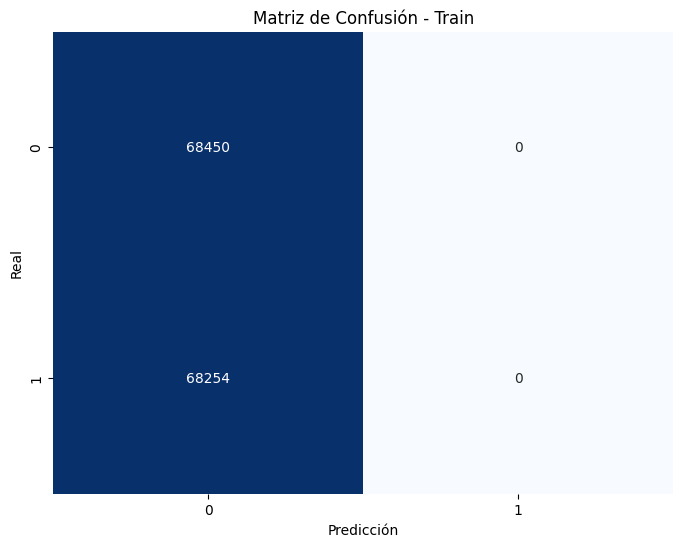

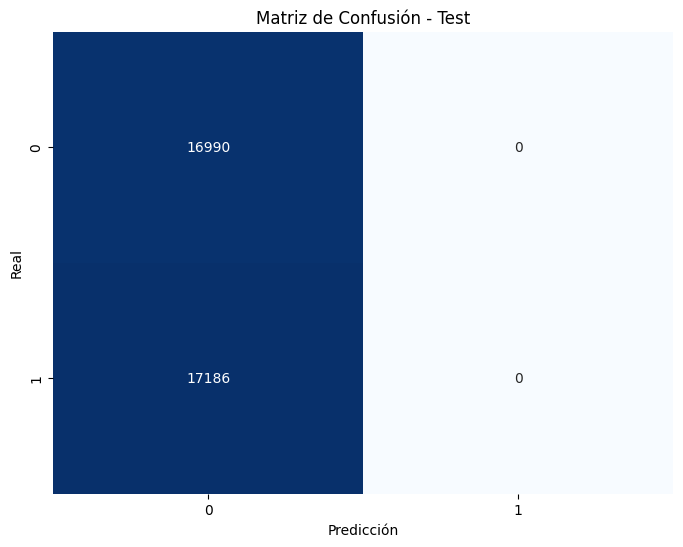

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convertir las predicciones a clases
y_train_classes = np.argmax(y_train_pred, axis=1)
y_test_classes = np.argmax(y_test_pred, axis=1)

# Convertir las clases originales de y_train y y_test
y_train_original = np.argmax(to_categorical(y_train), axis=1)
y_test_original = np.argmax(to_categorical(y_test), axis=1)

# Imprimir el reporte de clasificación
print("Reporte de clasificación (Train):")
print(confusion_matrix(y_train_original, y_train_classes))
print(classification_report(y_train_original, y_train_classes))

print("Reporte de clasificación (Test):")
print(confusion_matrix(y_test_original, y_test_classes))
print(classification_report(y_test_original, y_test_classes))

# Crear la matriz de confusión
cm_train = confusion_matrix(y_train_original, y_train_classes)
cm_test = confusion_matrix(y_test_original, y_test_classes)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, title='Matriz de Confusión'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_train_original), yticklabels=np.unique(y_test_original))
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Graficar las matrices de confusión
plot_confusion_matrix(cm_train, title='Matriz de Confusión - Train')
plot_confusion_matrix(cm_test, title='Matriz de Confusión - Test')


In [ ]:
df_final['PagoBinario'].sum()

748

In [ ]:
# Definir el modelo LSTM
model = Sequential()

# Capa LSTM
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

# Otra capa LSTM opcional
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f'Accuracy: {accuracy * 100:.2f}%')

2694/2694 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step

Accuracy Score: 0.9913212976284401

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     85440
           1       0.00      0.00      0.00       748

    accuracy                           0.99     86188
   macro avg       0.50      0.50      0.50     86188
weighted avg       0.98      0.99      0.99     86188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 1, 128)              │          72,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,248 (1.53 MB)

 Trainable params: 134,082 (523.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,166 (1.02 MB)

None


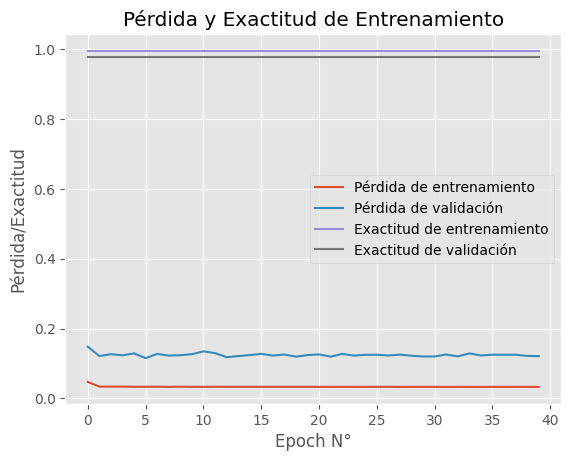

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Definición y entrenamiento del modelo LSTM
# Suponiendo que ya tienes tus datos preparados en X_sequences e y_sequences_categorical

# Evaluación del modelo en el conjunto de prueba
y_pred = np.argmax(model.predict(X_padded), axis=1)  # Asegúrate de que X_test esté preparado correctamente
y_test_labels = np.argmax(y_padded, axis=1)  # Convertir las etiquetas test a formato categórico

# Mostrar métricas de rendimiento
print("\nAccuracy Score:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

# Código adicional para generar gráfico y resumen del modelo
plt.style.use('ggplot')
plt.figure()

epoch_values = list(range(len(history.history['loss'])))
plt.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, history.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, history.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.savefig('grafico_entrenamiento_LSTM.png')

# Imprimir el resumen del modelo
print(model.summary())


In [ ]:
!pip install imbalanced-learn scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Generar un conjunto de datos desbalanceado
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimir la distribución de clases antes de aplicar SMOTE
print("Distribución de clases antes de SMOTE:", np.bincount(y_train))

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Imprimir la distribución de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:", np.bincount(y_resampled))

# Entrenar un clasificador
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred = model.predict(X_test)

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))


In [ ]:
df_final['Pago'].sum()

53052589.0

## Fase 5: Evaluation

## Fase 6: Deployment

In [ ]:
# # Nuevas secuencias de datos de los deudores para hacer predicciones
# new_debtor_sequences = [
#     # Ejemplo de secuencias de acciones de cobro para cada deudor (ya escalados)
#     [[0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,],  # Acciones del deudor 1
#      [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]], # Segunda secuencia del deudor 1
#     [[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]],  # Acciones del deudor 2
#     [[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]]   # Acciones del deudor 3
# ]

# # features = [
# #     'PagoBinario', 'TipoGestion_Administrativa', 'TipoGestion_Compromiso', 'TipoGestion_Compromiso-Com',
# #     'TipoGestion_EMAIL', 'TipoGestion_Negativa', 'TipoGestion_Negativa-Com',
# #     'TipoGestion_Positiva', 'TipoGestion_Positiva-Adm', 'TipoGestion_Positiva-Com',
# #     'TipoGestion_Positiva-Indi', 'TipoGestion_Positiva-Wsp', 'TipoGestion_Sistema',
# #     'TipoGestion_Terreno', 'Sin acciones', 'Correo electrónico', 'SMS', 'Whatsapp',
# #     'Llamada por bot', 'Llamada directa', 'Acciones judiciales', 'Cantidad_AccionesCobranza',
# #     'Cantidad_Gestiones', 'gestion_positiva', 'cluster'
# # ]
# # Estandariza las secuencias de los nuevos deudores
# new_debtor_sequences_scaled = [scaler.transform(seq) for seq in new_debtor_sequences]

# # Realiza el padding de las secuencias para asegurar la longitud adecuada
# new_debtor_sequences_padded = pad_sequences(new_debtor_sequences_scaled, padding='post', dtype='float32')

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model  # Para cargar el modelo entrenado

# Ejemplo de secuencias de 25 variables por cada deudor (10 deudores en total)
new_debtor_sequences = [
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]],
    [[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]],
    [[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]],
    [[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
    [[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]],
    [[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]],
    [[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]],
    [[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]],
    [[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0]],
    [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
]

# Escalar las secuencias
scaler = StandardScaler()
new_debtor_sequences_scaled = [scaler.fit_transform(seq) for seq in new_debtor_sequences]

# Asegurarse de que las secuencias estén bien alineadas (pad si es necesario)
new_debtor_sequences_padded = pad_sequences(new_debtor_sequences_scaled, padding='post', dtype='float32')

# Realizar las predicciones con el modelo LSTM entrenado
predictions = model.predict(new_debtor_sequences_padded)

# Convertir las predicciones en clases (0 = ineficiente, 1 = eficiente)
predicted_classes = [np.argmax(pred) for pred in predictions]

# Mostrar la predicción para cada deudor
for idx, pred_class in enumerate(predicted_classes):
    print(f'Deudor {idx+1}: Acción de cobranza eficiente predicha: {pred_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Deudor 1: Acción de cobranza eficiente predicha: 0
Deudor 2: Acción de cobranza eficiente predicha: 0
Deudor 3: Acción de cobranza eficiente predicha: 0
Deudor 4: Acción de cobranza eficiente predicha: 0
Deudor 5: Acción de cobranza eficiente predicha: 0
Deudor 6: Acción de cobranza eficiente predicha: 0
Deudor 7: Acción de cobranza eficiente predicha: 0
Deudor 8: Acción de cobranza eficiente predicha: 0
Deudor 9: Acción de cobranza eficiente predicha: 0
Deudor 10: Acción de cobranza eficiente predicha: 0


In [ ]:
# Realizar predicciones usando el modelo LSTM entrenado
predictions = model.predict(new_debtor_sequences_padded)

# Convertir las predicciones en clases (0 = acción ineficiente, 1 = acción eficiente)
predicted_classes = [np.argmax(pred) for pred in predictions]

# Mostrar la predicción para cada deudor
for idx, pred_class in enumerate(predicted_classes):
    print(f'Deudor {idx+1}: Acción de cobranza eficiente predicha: {pred_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Deudor 1: Acción de cobranza eficiente predicha: 0
Deudor 2: Acción de cobranza eficiente predicha: 0
Deudor 3: Acción de cobranza eficiente predicha: 0


In [ ]:
import pandas as pd

# Crear un DataFrame con los resultados
resultados_deudores = pd.DataFrame({
    'Deudor': [f'Deudor {i+1}' for i in range(len(predicted_classes))],
    'AccionCobranzaPredicha': predicted_classes
})

# Guardar los resultados en un archivo CSV o mostrar un resumen
resultados_deudores.to_csv('predicciones_cobranza.csv', index=False)
print(resultados_deudores)


     Deudor  AccionCobranzaPredicha
0  Deudor 1                       0
1  Deudor 2                       0
2  Deudor 3                       0


In [12]:
df = pd.read_csv(r"/content/df_group.csv", )
df.head(7)

,accion_predicha,deudores,total_deudores
0,Acciones judiciales,"40851128,60895808,77740400,90643586,116900732,...",6
1,Correo electronico,"15540356,17553794,19680218,20896556,21116144,2...",4356
2,Llamada directa,"592580,22044824,23429852,24624212,26569886,266...",520
3,Llamada por bot,"14269610,17730122,18514970,18707948,18947930,1...",6239
4,SMS,"83584754,114389234",2
5,Sin acciones,"8620334,12615620,12865394,12957074,13061276,13...",75063
6,Whatsapp,"59690180,156235700",2


In [22]:
import pandas as pd
import numpy as np

# Supongamos que df contiene las columnas 'deudores' y 'accion_predicha'
# Cargar el DataFrame si es necesario (ejemplo ficticio)
# df = pd.read_csv('/path/to/your/data.csv')

# Asegurarse de que los valores en 'deudores' son listas; si no, convertirlos a listas
df['deudores'] = df['deudores'].apply(lambda x: x if isinstance(x, list) else x.strip("[]").split(','))

# Crear un DataFrame individual por deudor
df_deudores = df.explode('deudores').rename(columns={'deudores': 'deudor'})

# Simulación: establecer una probabilidad de incumplimiento para cada acción
probabilidad_incumplimiento = {
    'Sin acciones': 0.3,
    'Correo electronico': 0.25,
    'SMS': 0.2,
    'Whatsapp': 0.15,
    'Llamada por bot': 0.1,
    'Llamada directa': 0.05,
    'Acciones judiciales': 0.01
}

# Función para simular incumplimiento basado en probabilidades
def simular_incumplimiento(accion):
    return np.random.rand() < probabilidad_incumplimiento.get(accion, 0)

# Marcar deudores incumplidos
df_deudores['incumplimiento'] = df_deudores['accion_predicha'].apply(simular_incumplimiento)

# Definir acciones de escalamiento
acciones_escalamiento = {
    'Sin acciones': 'Correo electronico',
    'Correo electronico': 'SMS',
    'SMS': 'Whatsapp',
    'Whatsapp': 'Llamada por bot',
    'Llamada por bot': 'Llamada directa',
    'Llamada directa': 'Acciones judiciales',
    'Acciones judiciales': 'Acciones judiciales'  # Acción final sin más escalamiento
}

# Reasignar acción a deudores que incumplen
df_deudores['accion_ajustada'] = df_deudores.apply(
    lambda row: acciones_escalamiento[row['accion_predicha']] if row['incumplimiento'] else row['accion_predicha'],
    axis=1
)

# Ver los resultados agrupados nuevamente
df_resultado = df_deudores.groupby('accion_ajustada').agg(
    deudores=('deudor', lambda x: ','.join(x)),
    total_deudores=('deudor', 'count')
).reset_index()

# Exportar el DataFrame resultante a CSV
df_resultado.to_csv('/content/df_resultado_escalado.csv', index=False)
print("Archivo 'df_resultado_escalado.csv' guardado exitosamente.")


Archivo 'df_resultado_escalado.csv' guardado exitosamente.


In [23]:
df_resultado.head(7)

,accion_ajustada,deudores,total_deudores
0,Acciones judiciales,"40851128,60895808,77740400,90643586,116900732,...",32
1,Correo electronico,"15540356,17553794,19680218,20896556,21116144,2...",25523
2,Llamada directa,"592580,22044824,23429852,24624212,26569886,266...",1139
3,Llamada por bot,"14269610,17730122,18514970,18947930,19059296,1...",5594
4,SMS,"23121302,26538566,26981264,29412122,29696456,2...",1068
5,Sin acciones,"8620334,12615620,12865394,13061276,13661258,14...",52830
6,Whatsapp,"59690180,156235700",2
